<h2>MIDTERMS EXAM DATA ANALYTICS</h2>
<hr>
<h3>Data Analyst: Christian Owen Protacio</h3>

In [53]:
#FIRST WE HAVE TO IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#MAKING A PATH TO CONVERT YOUR OWN VARIABLE
crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')

<h2>CHICAGO CRIME</h2>

In [3]:
#Printing your variable you set 
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"


In [5]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [6]:
crimes.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>FILLING UP NULL VALUES</h2>

In [8]:
#Checking the null values so i can fill it up
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [9]:
crimes['Location Description'] = crimes['Location Description'].fillna(crimes['Location Description'].mode()[0])
crimes['District'] = crimes['District'].fillna(crimes['District'].mode()[0])
crimes['Ward'] = crimes['Ward'].fillna(crimes['Ward'].mode()[0])
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mode()[0])
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['X Coordinate'].mode()[0])
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Y Coordinate'].mode()[0])
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['Location'] = crimes['Location'].fillna(crimes['Location'].mode()[0])

In [10]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h2>CHANGING DATATYPES INTO COLUMN</h2>

In [11]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [12]:
crimes['ID'] = crimes['ID'].astype('int')
crimes['Case Number'] = crimes['Case Number'].astype('string')
crimes['Date'] = crimes['Date'].astype('str')
crimes['Date'] = crimes['Date'].str.replace('/', '-')
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')
crimes['Block'] = crimes['Block'].astype('string')
crimes['IUCR'] = crimes['IUCR'].astype('string')
crimes['Primary Type'] = crimes['Primary Type'].astype('string')
crimes['Description'] = crimes['Description'].astype('string')
crimes['Location Description'] = crimes['Location Description'].astype('string')
crimes['Arrest'] = crimes['Arrest'].astype('bool')
crimes['Domestic'] = crimes['Domestic'].astype('bool')
crimes['Beat'] = crimes['Beat'].astype('int')
crimes['District'] = crimes['District'].astype('int')
crimes['Ward'] = crimes['Ward'].astype('int')
crimes['Community Area'] = crimes['Community Area'].astype('int')
crimes['FBI Code'] = crimes['FBI Code'].astype('string')
crimes['X Coordinate'] = crimes['X Coordinate'].astype('float')
crimes['Y Coordinate'] = crimes['Y Coordinate'].astype('float')
crimes['Year'] = crimes['Year'].astype('int')
crimes['Updated On'] = pd.to_datetime(crimes['Updated On'], dayfirst=True, errors='coerce')
crimes['Latitude'] = crimes['Latitude'].astype('float')
crimes['Longitude'] = crimes['Longitude'].astype('float')
crimes['Location'] = crimes['Location'].astype('string')

In [13]:
crimes.dtypes

ID                               int64
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type            string[python]
Description             string[python]
Location Description    string[python]
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                string[python]
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                string[python]
dtype: object

<h2>EXTRACTING DATE AND TIME FEAUTURES</h2>

In [52]:
crimes['Date'] = pd.to_datetime(crimes['Date'])

# extract multiple time features
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Day'] = crimes['Date'].dt.day
crimes['Hour'] = crimes['Date'].dt.hour
crimes['Weekday'] = crimes['Date'].dt.day_name()
crimes['Weekend'] = crimes['Weekday'].isin(['Saturday', 'Sunday'])

crimes[['Date','Year','Month','Day','Hour','Weekday','Weekend']].head()

,Date,Year,Month,Day,Hour,Weekday,Weekend
0,2024-04-14,2024,4,14,0,Sunday,True
1,2024-04-14,2024,4,14,0,Sunday,True
2,2024-04-14,2024,4,14,0,Sunday,True
3,2024-04-14,2024,4,14,0,Sunday,True
4,2024-04-14,2024,4,14,0,Sunday,True


<h2>NOW LETS MAKE AN DATA INSIGHTS OR ANALYSIS</h2>

In [15]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Weekday,Weekend
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,2024,2024-12-21 15:40:46,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,14,0,Sunday,True
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,2024,2024-12-21 15:40:46,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,14,0,Sunday,True
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,2024,2024-12-21 15:40:46,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,14,0,Sunday,True
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,2024,2024-12-21 15:40:46,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,14,0,Sunday,True
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,2024,2024-12-21 15:40:46,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,14,0,Sunday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,2025,2025-04-19 15:41:24,41.928440,-87.700416,"(41.928439867, -87.700415972)",12,4,0,Thursday,False
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,2025,2025-04-19 15:41:24,41.723545,-87.632040,"(41.723545182, -87.632039508)",12,4,0,Thursday,False
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2025,2025-04-19 15:41:24,41.740998,-87.638606,"(41.74099774, -87.638606337)",12,4,0,Thursday,False
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,2025,2025-04-19 15:41:24,41.802477,-87.652657,"(41.802477219, -87.652657244)",12,4,0,Thursday,False


<h2>TOP 5 CRIME TYPES IN CHICAGO?</h2>
<hr
<h3>Insight1: I found out that theft has the highest making crime in chicago, a common crime with a total of 59,201. This shows theft has most crime among this top 5 crime. </h3>

In [16]:
crimes['Primary Type'].value_counts().head(5)

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
Name: count, dtype: Int64

<h2>WHERE OFTEN HAPPENS THEFT CRIME IN CHICAGO?</h2>
<hr
<h3>Insight2: The majority of theft incidents occur in public and accessible areas. Streets account a total of 13,185 reported cases, making them the most common theft location.</h3>

In [17]:
crimes[crimes['Primary Type']=='THEFT']['Location Description'].value_counts().head(5)

Location Description
STREET                13185
APARTMENT              7513
SMALL RETAIL STORE     6680
DEPARTMENT STORE       4726
RESIDENCE              4350
Name: count, dtype: Int64

<h2>WHICH CRIMES HAVE THE HIGHEST AND LOWEST LIKELIHOOD OF RESULTING IN AN ARREST?</h2>
<hr
<h3>Crimes like NARCOTICS AND PROSTITUTION have very high arrest rates because they are usually caught during active police operations, while property crimes such as THEFT AND MOTOR VEHICLE THEFT show very low arrest rates, highlighting the difficulty of identifying and apprehending offenders after the crime occurs.</h3>

In [18]:
crimes.groupby('Primary Type')['Arrest'].value_counts()

Primary Type                       Arrest
ARSON                              False       427
                                   True         25
ASSAULT                            False     20115
                                   True       2500
BATTERY                            False     36932
                                   True       7647
BURGLARY                           False      8027
                                   True        416
CONCEALED CARRY LICENSE VIOLATION  True        246
                                   False         3
CRIMINAL DAMAGE                    False     25987
                                   True       1107
CRIMINAL SEXUAL ASSAULT            False      1533
                                   True         40
CRIMINAL TRESPASS                  False      3569
                                   True       1476
DECEPTIVE PRACTICE                 False     14545
                                   True        446
GAMBLING                           True 

<h2>WHAT IS THE OVERALL ARREST RATE?</h2>
<hr
<h3>Insight4: Only about 14% of crimes lead to arrests, showing that most cases remain unsolved or unresolved.</h3>

In [19]:
crimes['Arrest'].mean()

np.float64(0.14451495847432794)

<h2>WHICH CRIME TYPES HAVE THE HIGHEST ARREST RATES?</h2>
<hr
<h3>Insight5: Crimes like weapons violations and prostitution have the highest likelihood of arrest, likely due to direct evidence and active police operations.</h3>

In [20]:
crimes.groupby('Primary Type')['Arrest'].mean().loc[lambda x: crimes['Primary Type'].value_counts()[x.index] > 1000].sort_values(ascending=False).head(5)


Primary Type
NARCOTICS                 0.958352
WEAPONS VIOLATION         0.648520
PUBLIC PEACE VIOLATION    0.486083
CRIMINAL TRESPASS         0.292567
OTHER OFFENSE             0.200703
Name: Arrest, dtype: float64

<h2>WHICH CRIME TYPES HAVE THE LOWEST ARREST RATES?</h2>
<hr
<h3>Insight6: Property crimes like motor vehicle theft, and burglary have very low arrest rates, suggesting these are harder to resolve compared to crimes with clear evidence.</h3>

In [21]:
crimes.groupby('Primary Type')['Arrest'].mean().loc[lambda x: crimes['Primary Type'].value_counts()[x.index] > 1000].sort_values().head(5)

Primary Type
CRIMINAL SEXUAL ASSAULT    0.025429
MOTOR VEHICLE THEFT        0.027698
DECEPTIVE PRACTICE         0.029751
CRIMINAL DAMAGE            0.040858
BURGLARY                   0.049272
Name: Arrest, dtype: float64

<h2>QUESTION: WHICH CRIMES HAVE A MID-RANGE ARREST RATE (20–30%)?</h2>
<hr
<h3>Insight7: CRIMINAL TRESPASS,HOMICIDE,OTHER NARCOTIC VIOLATION, and OTHER OFFENSE show mid-range arrest rates, meaning police resolve some cases but many remain unsolved.</h3>

In [22]:
arrest_rates = crimes.groupby('Primary Type')['Arrest'].mean()
arrest_rates[(arrest_rates >= 0.2) & (arrest_rates <= 0.3)]

Primary Type
CRIMINAL TRESPASS           0.292567
HOMICIDE                    0.265823
OTHER NARCOTIC VIOLATION    0.285714
OTHER OFFENSE               0.200703
Name: Arrest, dtype: float64

<h2>WHICH CRIMES ARE MOST COMMON DURING WEEKENDS IN CHICAGO?</h2>
<hr
<h3>Insight9: Theft and battery dominate weekend crime activity, suggesting higher incidents in crowded social areas and public spaces. crimes like assault, robbery, and motor vehicle theft also rise, likely influenced by increased outdoor movement and nightlife during weekends.</h3>

In [23]:
weekend_crimes = crimes.groupby(['Weekend','Primary Type']).size().unstack().fillna(0)
weekend_crimes.loc[True].sort_values(ascending=False).head(10)

Primary Type
THEFT                  16357.0
BATTERY                13453.0
CRIMINAL DAMAGE         8076.0
ASSAULT                 6304.0
MOTOR VEHICLE THEFT     5746.0
OTHER OFFENSE           4460.0
DECEPTIVE PRACTICE      3694.0
ROBBERY                 2411.0
BURGLARY                2250.0
WEAPONS VIOLATION       2167.0
Name: True, dtype: float64

<h2>DURING WHICH HOURS OF THE DAY DO MOST CRIMES OCCUR IN CHICAGO?</h2>
<hr
<h3>Insight10: Crime activity peaks between noon and early evening, especially around 12 pm to 6 pm, when public movement is highest. incidents gradually decrease late at night, indicating that daytime hours are the most active period for criminal activity.</h3>

In [39]:
crimes['Hour'] = pd.to_datetime(crimes['Date']).dt.hour
crimes['Hour'].value_counts().sort_index()

Hour
0     16752
1      8420
2      7504
3      6477
4      5227
5      4551
6      4744
7      6368
8      8576
9     10171
10    10543
11    11023
12    14247
13    11268
14    11936
15    13511
16    13288
17    13566
18    13286
19    12902
20    12460
21    11534
22    10936
23     9833
Name: count, dtype: int64

<h2>WHICH CRIME LOCATIONS ARE MOST ARREST-PRONE?</h2>
<hr
<h3>Insight11: locations such as cta platforms, cta property, offices, hotels, and jail facilities have the highest arrest rates, indicating that crimes in these controlled or monitored areas are more likely to result in immediate police intervention and apprehension.</h3>

In [24]:
crimes.groupby('Location Description')['Arrest'].mean().sort_values(ascending=False).head(5)

Location Description
CTA "L" PLATFORM           1.000000
CTA PROPERTY               1.000000
OFFICE                     1.000000
HOTEL                      1.000000
JAIL / LOCK-UP FACILITY    0.565217
Name: Arrest, dtype: float64

<h2>WHICH YEAR HAD THE HIGHEST CRIME COUNT?</h2>
<hr
<h3>Insight12: The year 2024 recorded the highest number of crimes, suggesting a recent surge in criminal activity that could be linked to population growth, economic challenges, or post-pandemic social shifts. </h3>

In [25]:
crimes['Year'].value_counts().idxmax()

np.int32(2024)

<h2>HOW MANY UNIQUE CRIME TYPES EXIST?</h2>
<hr
<h3>Insight13: There are dozens of distinct crime categories, showing chicago’s crime landscape is highly diverse.</h3>

In [32]:
crimes['Primary Type'].nunique()

31

<h2>WHICH CRIME TYPES ARE MOST LINKED TO SCHOOLS?</h2>
<hr
<h3>Insight14: Battery and assault are the leading crimes in school areas, highlighting concerns about physical confrontations and personal safety. theft and property damage also appear, indicating that both violent and non-violent incidents are common within educational environments.</h3>

In [34]:
school_crimes = crimes[crimes['Location Description'].str.contains("SCHOOL", na=False)]
school_crimes['Primary Type'].value_counts().head(5)

Primary Type
BATTERY            1548
ASSAULT             780
THEFT               334
OTHER OFFENSE       247
CRIMINAL DAMAGE     159
Name: count, dtype: Int64

<h2>WHICH CRIMES ARE MOST COMMON IN PARKS?</h2>
<hr
<h3>Insight15: Theft and battery are the top crimes committed in park areas, suggesting that public spaces are vulnerable to both property and physical offenses. the presence of assault, robbery, and weapons violations further indicates safety risks in recreational zones where people gather.</h3>

In [35]:
crimes[crimes['Location Description']=="PARK PROPERTY"]['Primary Type'].value_counts().head(5)

Primary Type
THEFT                487
BATTERY              483
ASSAULT              190
ROBBERY              126
WEAPONS VIOLATION    117
Name: count, dtype: Int64

<h2>WHICH CRIME TYPES ARE MOST LIKELY TO INVOLVE JUVENILES?</h2>
<hr
<h3>Insight16: Juvenile-related crimes are very rare in the dataset, with only a few prostitution-related cases recorded. this suggests that offenses explicitly categorized as involving juveniles are minimal or possibly underreported in official records.</h3>

In [37]:
juvenile_crimes = crimes[crimes['Description'].str.contains("JUVENILE", na=False)]
juvenile_crimes['Primary Type'].value_counts().head(10)

Primary Type
PROSTITUTION    2
Name: count, dtype: Int64

<h2>WHICH TYPES OF CRIMES MOST FREQUENTLY INVOLVE FIREARMS IN CHICAGO?</h2>
<hr
<h3>Insight17: Weapons violations are the most common firearm-related crimes, followed by assault and robbery. this indicates that firearms are primarily linked to illegal possession and violent confrontations, emphasizing the ongoing issue of gun-related offenses in the city.</h3>

In [45]:
firearm_crimes = crimes[crimes['Description'].str.contains("FIREARM", na=False)]
firearm_crimes['Primary Type'].value_counts().head(5)

Primary Type
WEAPONS VIOLATION          2148
ASSAULT                     198
ROBBERY                     102
BATTERY                      14
CRIMINAL SEXUAL ASSAULT       4
Name: count, dtype: Int64

<h2>LET'S SEE THE DATSETS ON DATA VISUALIZATION TO SEE IT MORE UNDERSTANDING</h2>

<h2>WHAT ARE THE TOP 10 MOST COMMON CRIME TYPE?</h2>
<hr
<h3>Insight18: Theft, battery, and criminal damage are the top crimes, dominating overall crime activity.</h3>

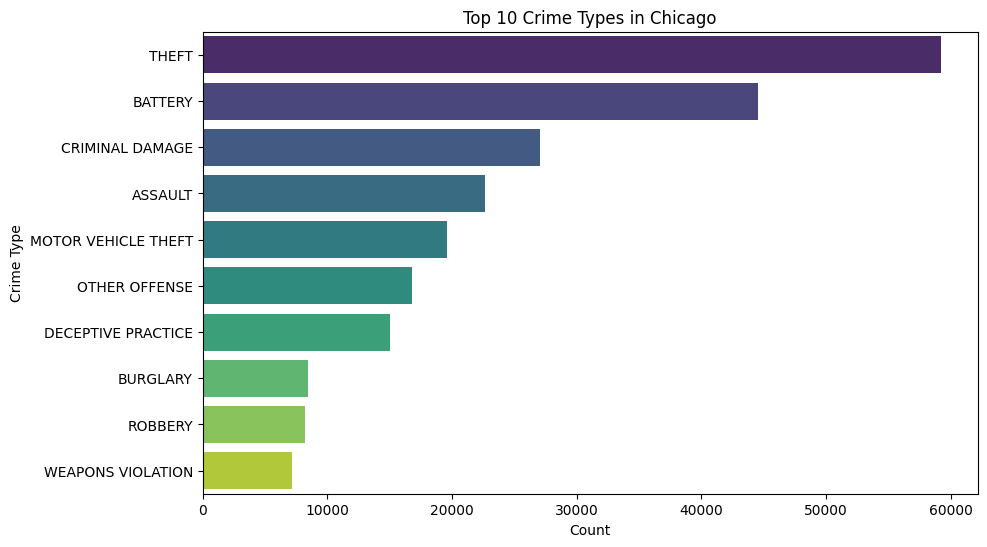

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=crimes, y='Primary Type', order=crimes['Primary Type'].value_counts().head(10).index, palette='viridis')
plt.title("Top 10 Crime Types in Chicago")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

<h2>ARREST VS NO-ARREST RATIO? </h2>
<hr
<h3>Insight19: Visual shows most incidents end without an arrest.</h3>

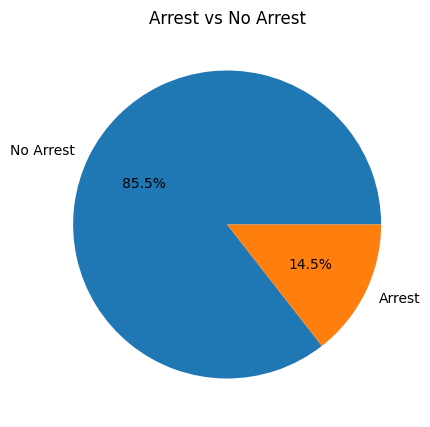

In [27]:
plt.figure(figsize=(5,5))
crimes['Arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No Arrest','Arrest'])
plt.title('Arrest vs No Arrest'); plt.ylabel(''); plt.show()

<h2>ARREST RATE BY CRIME TYPE TOP 15 BY COUNT?</h2>
<hr
<h3>Insight20: Some low-volume offenses show high arrest rates (proactive enforcement), while high-volume property crimes show low rates.</h3>
<hr
<h3>Insight21: Narcotics has the highest arrest rate among all crime types, nearing 100%, indicating strong law enforcement focus and detection in drug-related cases.</h3>
<hr
<h3>Insight24: Weapons violations also have a very high arrest rate (above 60%), showing that crimes involving firearms or weapons often lead to immediate police action.</h3>
<hr
<h3>Insight25: In contrast, crimes like theft, burglary, and motor vehicle theft have very low arrest rates, suggesting that these are harder to investigate or offenders often escape without being caught.</h3>                                                                                                                                                

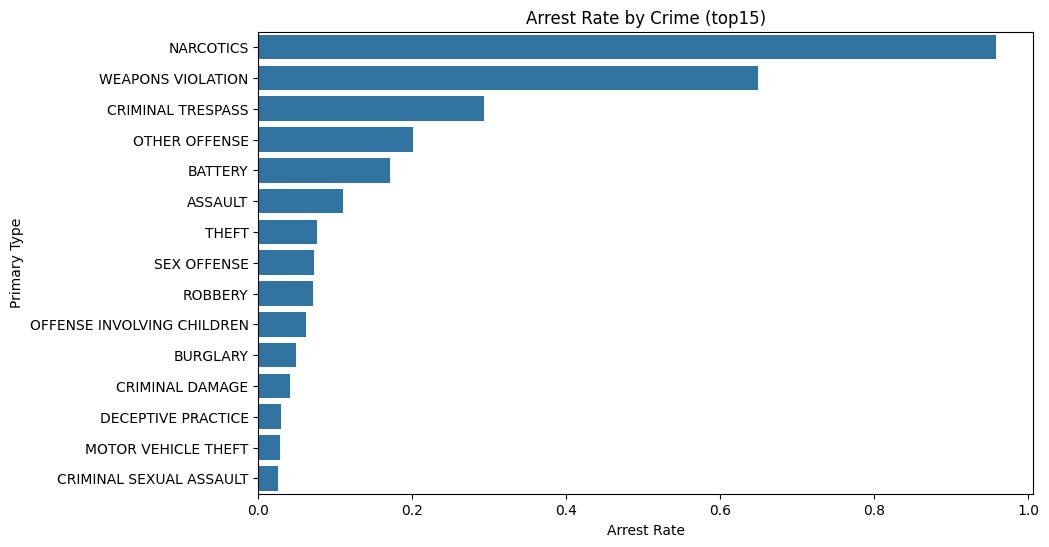

In [28]:
top15 = crimes['Primary Type'].value_counts().head(15).index
arrest_rates = crimes[crimes['Primary Type'].isin(top15)].groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6)); sns.barplot(x=arrest_rates.values, y=arrest_rates.index); plt.xlabel('Arrest Rate'); plt.title('Arrest Rate by Crime (top15)'); plt.show()


<h2>HOW DO CRIMES DISTRIBUTE ACROSS MONTHS?</h2>
<hr
<h3>Insight26: Summer months generally have more crime activity.</h3>

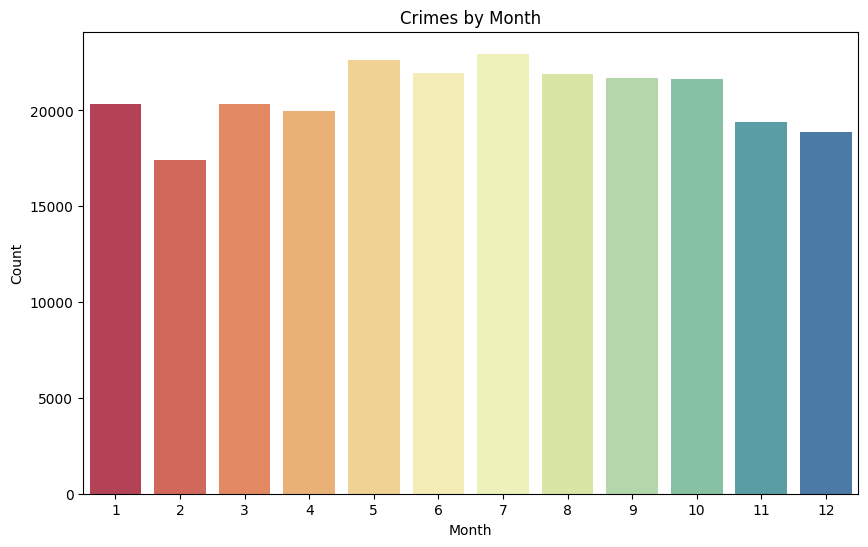

In [29]:
plt.figure(figsize=(10,6))
crimes['Month'] = pd.to_datetime(crimes['Date']).dt.month
sns.countplot(x='Month', data=crimes, palette='Spectral')
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

<h2>HOW DO CRIME LOCATIONS DISTRIBUTE OVER TIME OF DAY?</h2>
<hr
<h3>Insight27: Street crimes dominate across nearly all hours, with a significant spike during late evenings (18:00–22:00), highlighting the risks of outdoor public spaces at night.</h3>
<hr
<h3>Insight28: Apartments and residences see relatively steady crime activity throughout the day, with a noticeable increase in the early morning and evening hours when people are home.</h3>

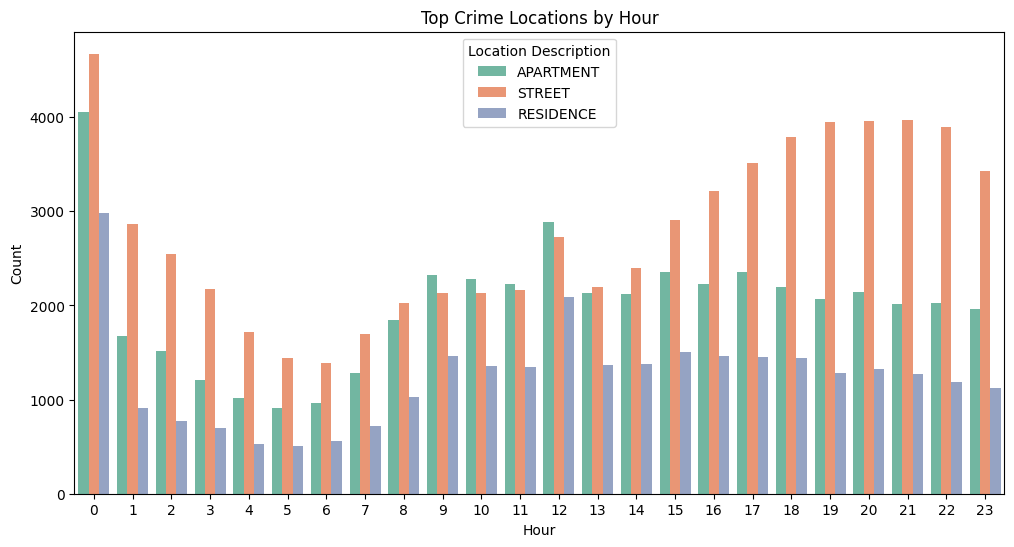

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='Location Description',
              data=crimes[crimes['Location Description'].isin(crimes['Location Description'].value_counts().head(3).index)],
              palette='Set2')
plt.title("Top Crime Locations by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

<h2>WHICH DISTRICTS REPORT THE MOST CRIMES?</h2>
<hr
<h3>Insight29: Central districts show the highest number of recorded crimes.</h3>

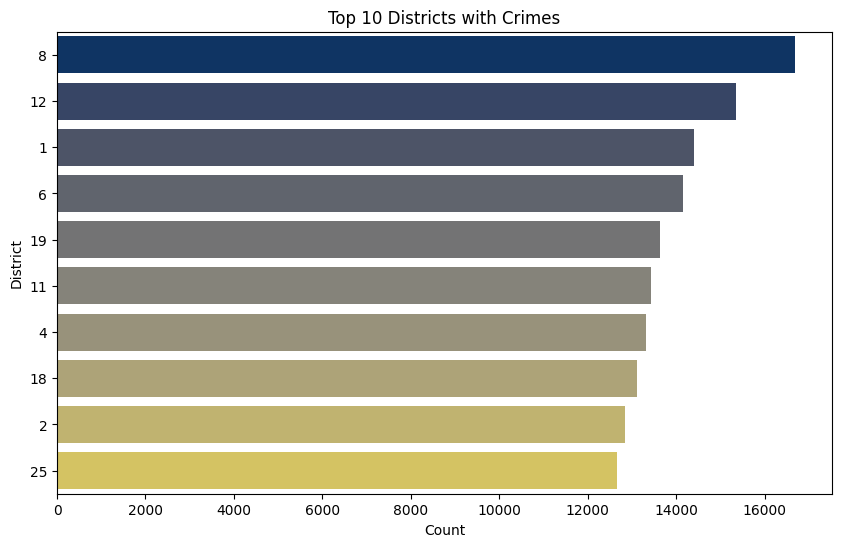

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y='District', data=crimes,
              order=crimes['District'].value_counts().head(10).index,
              palette='cividis')
plt.title("Top 10 Districts with Crimes")
plt.xlabel("Count")
plt.ylabel("District")
plt.show()

<h2>HOW DO CRIME TYPES DISTRIBUTE ACROSS DISTRICTS?</h2>
<hr
<h3>Insights30: Theft dominates across almost all districts.</h3>

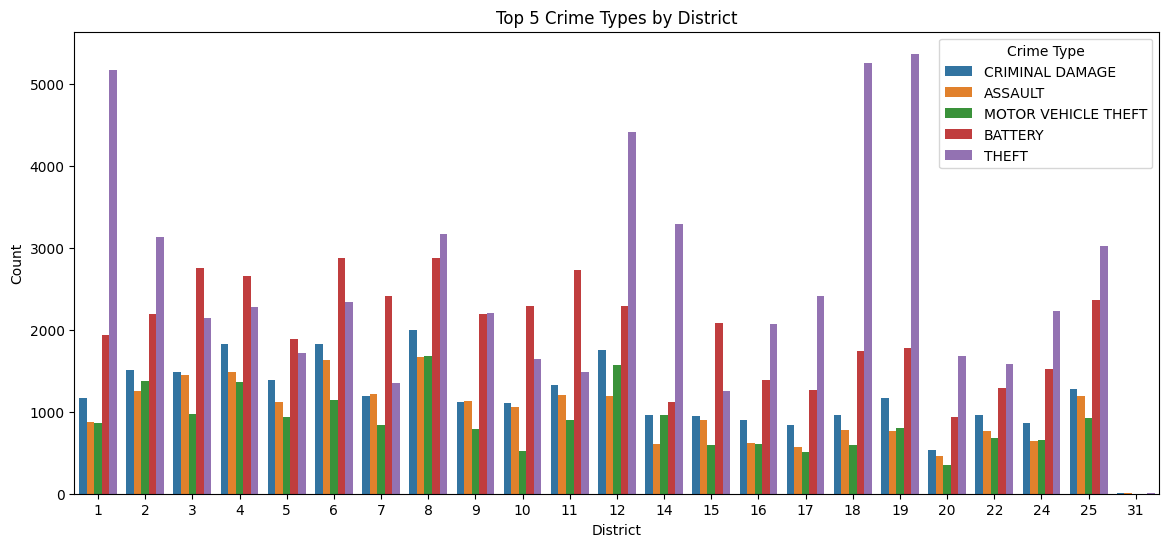

In [31]:
plt.figure(figsize=(14,6))
sns.countplot(x='District', hue='Primary Type',
              data=crimes[crimes['Primary Type'].isin(crimes['Primary Type'].value_counts().head(5).index)],
              palette='tab10')
plt.title("Top 5 Crime Types by District")
plt.xlabel("District")
plt.ylabel("Count")
plt.legend(title="Crime Type")
plt.show()

<h2>HOW DO CRIMES DISTRIBUTE BETWEEN PROPERTY AND VIOLENT CRIMES?</h2>
<hr
<h3>Insight31: Property crimes like theft dominate over violent crimes like homicide.</h3>

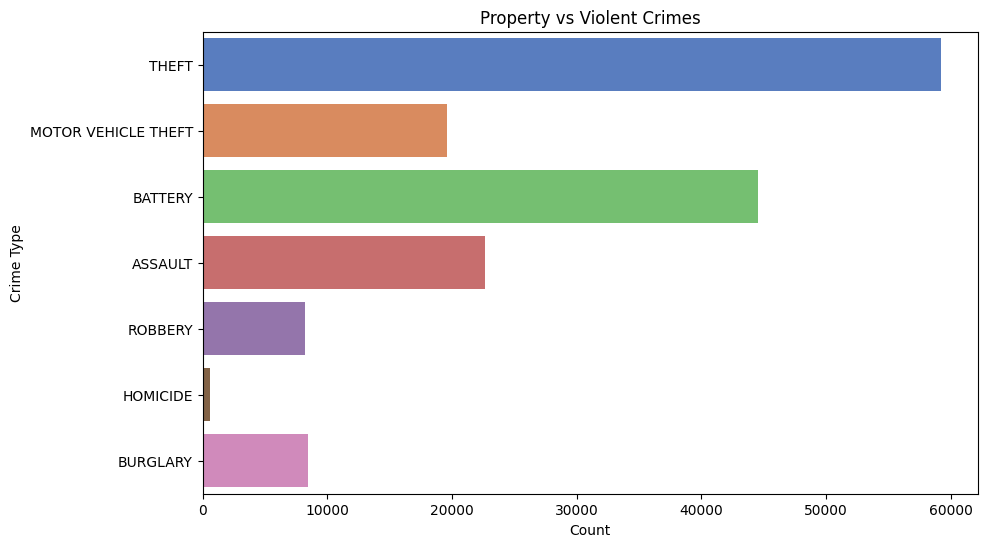

In [42]:
crime_types = ['THEFT','BURGLARY','MOTOR VEHICLE THEFT','BATTERY','ASSAULT','ROBBERY','HOMICIDE']
subset = crimes[crimes['Primary Type'].isin(crime_types)]
plt.figure(figsize=(10,6))
sns.countplot(y='Primary Type', data=subset, palette='muted')
plt.title("Property vs Violent Crimes")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

<h2>WHAT IS THE RELATIONSHIP BETWEEN ARRESTS AND HOURS OF DAY?</h2>
<hr
<h3>Insight32: Arrests are more likely during daytime hours, reflecting police activity.</h3>

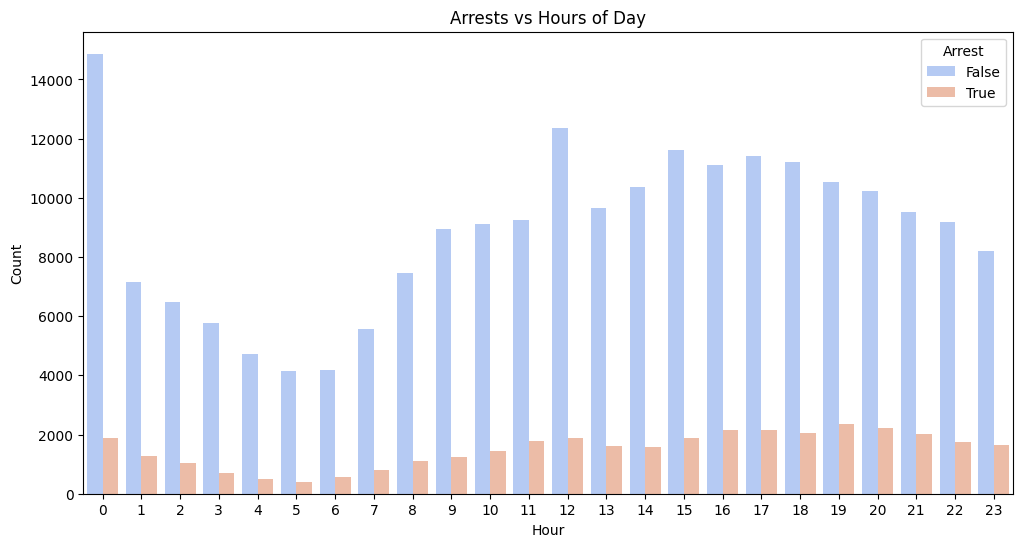

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='Arrest', data=crimes, palette='coolwarm')
plt.title("Arrests vs Hours of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

<h2>WHERE ARE CRIMES GEOGRAPHICALLY CLUSTERED ON A MAP?</h2>
<hr
<h3>Insight33: Crime hotspots are concentrated in central chicago, especially in dense urban areas.</h3>

In [38]:
crime_map_data = crimes.dropna(subset=['Latitude','Longitude'])
m = folium.Map(location=[crime_map_data['Latitude'].mean(), crime_map_data['Longitude'].mean()], zoom_start=11)
HeatMap(crime_map_data[['Latitude','Longitude']].sample(10000)).add_to(m)
m.save("crime_heatmap.html")
m

<h2>WHAT AREAS EXPERIENCE THE HIGHEST RATES OF ASSAULT CRIMES?</h2>
<hr
<h3>Insight34: Assault crimes are concentrated in residential and nightlife areas. this reflects both domestic disputes and alcohol-related altercations. identifying these clusters allows local authorities to prioritize conflict prevention programs.</h3>

In [47]:
assault_data = crimes[crimes['Primary Type'] == 'ASSAULT']
assault_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(assault_data[['Latitude', 'Longitude']].dropna(), radius=7).add_to(assault_map)
assault_map

<h2>WHICH LOCATIONS HAVE THE HIGHEST ROBBERY DENSITY?</h2>
<hr
<h3>Insight35: Robbery cases cluster around commercial and transportation corridors. these areas often have transient populations, making offenders harder to track. targeted patrols during evening hours may help curb these occurrences.</h3>

In [51]:
size = min(10000, len(robbery_map_data))

m = folium.Map(location=[robbery_map_data['Latitude'].mean(), robbery_map_data['Longitude'].mean()], zoom_start=11)
HeatMap(robbery_map_data[['Latitude', 'Longitude']].sample(size)).add_to(m)
m.save("crime_heatmap_robbery.html")
m